# Heart Disease

### Step-1: Load all usefull libraries

In [1]:
# basic libraries 
import pandas as pd 
import numpy as np

# plotting libraries
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# sklearn for label encoding
import sklearn as sl
import itertools
print("Setup Completed")


Setup Completed


### load all data 

In [2]:
file = ("/home/dp/Documents/Heart disease prediction/Heart_Disease_Prediction.csv") #file path
df = pd.read_csv(file) # load csv file 

In [3]:
df.head(15) # statisical data view

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [4]:
df.columns # no. of attributes in dataset

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [5]:
df.describe() #statistical data analysis

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.info() #dataset basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### convert Heart Disease data from object to binary digits using LabelEncoder.

In [8]:
# LabelEncoder is used to convert values into binary
from sklearn.preprocessing import LabelEncoder  
label_encoder= LabelEncoder()  
# Heart Disease column has type object so it is converted to binary value using LabelEncoder  
df['Heart Disease']= label_encoder.fit_transform(df['Heart Disease'])


In [9]:
df.isna().sum() # isna().sum() checks sum of total null values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [10]:
df.duplicated().sum() # check duplicate values

0

### barplot of Age and No.of people

Text(0, 0.5, 'No. of people of that age')

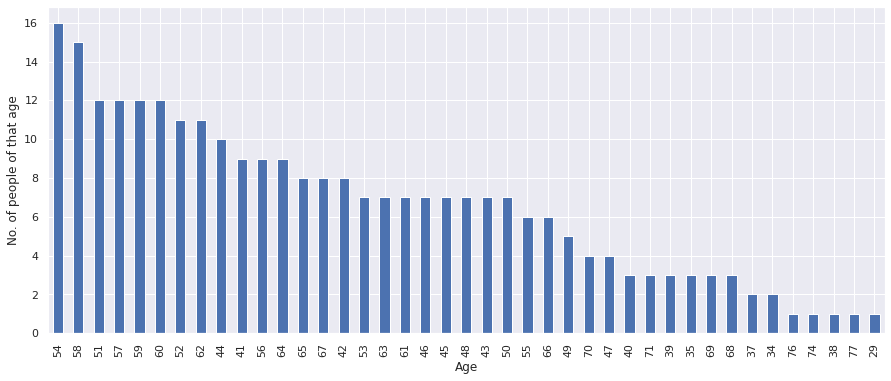

In [11]:
# barplot of age and no. of people in that particular age
y = df['Age'] 
plt.figure(figsize=(15,6)) # figure dimension
pd.value_counts(y).plot.bar() # amount of datapoint by age group
plt.xlabel("Age")
plt.ylabel("No. of people of that age")

### Age Histogram in age group

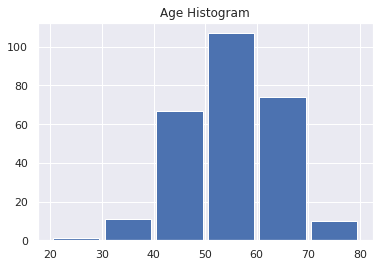

In [12]:
# histogram for age group in 10 years
bins = [20,30,40,50,60,70,80] # bins is used to divide the data into different age groups
plt.hist(y, bins, histtype='bar',rwidth=0.9)
plt.title('Age Histogram')
plt.show()

# Function for boxplot and pie plot

In [13]:
# pie_func function is created to plot pie chart
def pie_func(pie_var):
    plt.figure(figsize=(10,8)) # figure dimension
    title=input("Please enter title for the plot: ") # title of plot
    plot=pie_var.plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.25) # pie chart
    plt.legend(bbox_to_anchor=(1.5,1),ncol=3)
    plt.ylabel("")
    plt.title(title)

In [14]:
# boxplt_func function is created for box plot
def boxplt_func(box_x,box_y):
    title=input("Please enter title for the plot: ")# title of plot
    x_label=input("Enter X-Label: ")
    y_label=input("Enter Y-Label: ")
    box_plt=sns.boxplot(box_x,box_y) # box plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

### Pie chart of age group with percentage
visualizing total amount of people in different age group with the percentage of group

Please enter title for the plot: Pie chart of age group with percentage


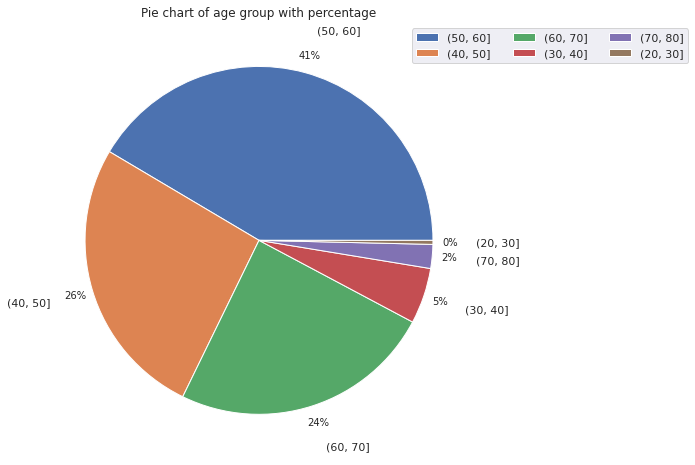

In [15]:
labels=["20-30","31-40","41-50","51-60","61-70","71-80"] # labels are used to give label to bins
df['bins'] = pd.cut(df['Age'],bins,labels) # cut age in different age group defined in bins and give them labels
c = df['bins'].value_counts()
pie_func(c)

### barplot of Sex vs Age

<AxesSubplot:xlabel='Sex', ylabel='Age'>

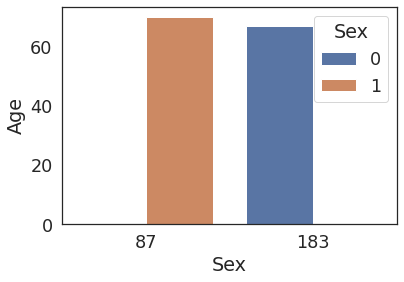

In [141]:
# Sex and Age barplot
a = df['Sex'].value_counts()
b = df['Age']
sns.barplot(x=a, y=b, data=df,hue='Sex')
#0=Female,1=Male

### Sex ratio piechart

Please enter title for the plot: Sex ratio piechart


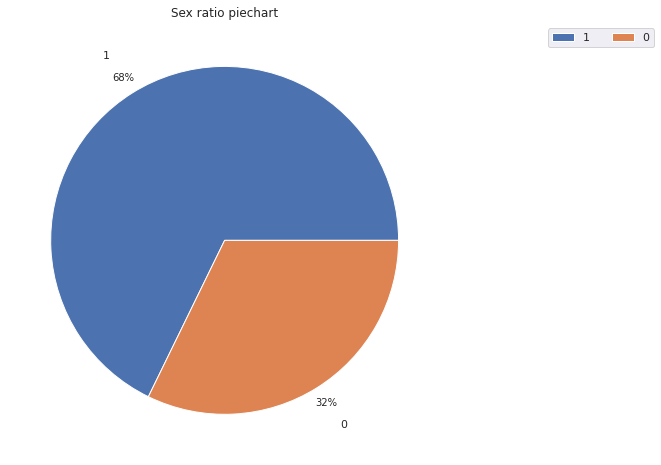

In [17]:
sex_ratio=df['Sex'].value_counts() # sex ratio pie chart shows 68% male and 32% female.
pie_func(sex_ratio)

### Creating function to display particular age group value

In [18]:
# function for displaying different age group values
def age_grp(x,y):
    age_lower=df.loc[df.Age >= x] # selecting all values before x
    age_high = pd.DataFrame(age_lower) # convert age_lower into dataframe
    
    age_perf=age_high.loc[age_high['Age'] <= y] # selecting values after y
    del age_perf['bins'] # delete bins column because not needed
    
    return(age_perf)

In [19]:
#using age_grp function define different age groups 
age20_30 = age_grp(20,30)
age31_40 = age_grp(31,40)
age41_50 = age_grp(41,50)
age51_60 = age_grp(51,60)
age61_70 = age_grp(61,70)
age71_80 = age_grp(71,80)


## Cholesterol Analysis

### Age 20-30 Cholesterol boxplot

Please enter title for the plot: Age 20-30 Cholesterol boxplot
Enter X-Label: Age
Enter Y-Label: Cholesterol


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


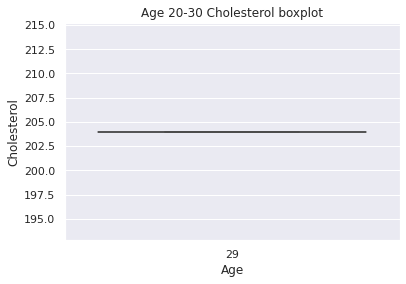

In [20]:
# boxplot for cholesterol in age group 20-30
boxplt_func(age20_30['Age'],age20_30['Cholesterol']) 

### Age 31-40 Cholesterol boxplot 

Please enter title for the plot: Age 31-40 Cholesterol boxplot
Enter X-Label: Age
Enter Y-Label: Cholesterol


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


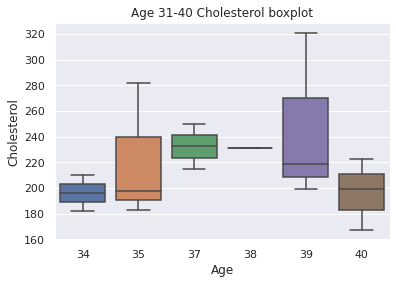

In [21]:
# boxplot for cholesterol in age group 31-40
boxplt_func(age31_40['Age'],age31_40['Cholesterol']) 

### Age 41-50 Cholesterol boxplot

Please enter title for the plot: Age 41-50 Cholesterol boxplot
Enter X-Label: Age
Enter Y-Label: Cholesterol


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


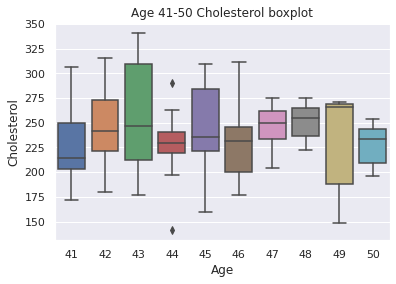

In [22]:
# boxplot for cholesterol in age group 41-50
boxplt_func(age41_50['Age'],age41_50['Cholesterol'])

### Age 51-60 Cholesterol boxplot

Please enter title for the plot: Age 51-60 Cholesterol boxplot
Enter X-Label: Age
Enter Y-Label: Cholesterol


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


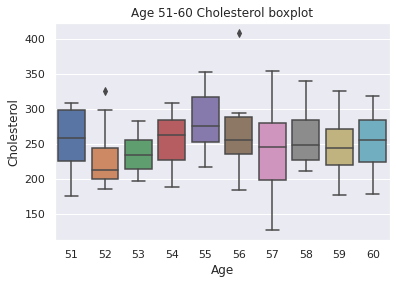

In [23]:
# boxplot for cholesterol in age group 51-60
boxplt_func(age51_60['Age'],age51_60['Cholesterol'])

### Age 61-70 Cholesterol boxplot

Please enter title for the plot: Age 61-70 Cholesterol boxplot
Enter X-Label: Age
Enter Y-Label: Cholesterol


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


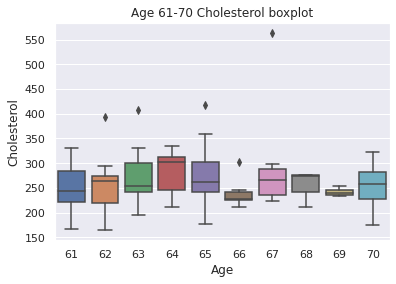

In [24]:
# boxplot for cholesterol in age group 61-70
boxplt_func(age61_70['Age'],age61_70['Cholesterol'])

### Age 71-80 Cholesterol boxplot

Please enter title for the plot: Age 71-80 Cholesterol boxplot
Enter X-Label: Age
Enter Y-Label: Cholesterol


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


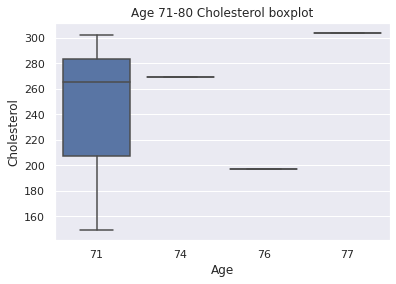

In [25]:
# boxplot for cholesterol in age group 71-80
boxplt_func(age71_80['Age'],age71_80['Cholesterol'])

## Blood Pressure Analysis

### Age 20-30 Blood pressure boxplot

Please enter title for the plot: Age 20-30 Blood pressure boxplot
Enter X-Label: Age
Enter Y-Label: BP


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


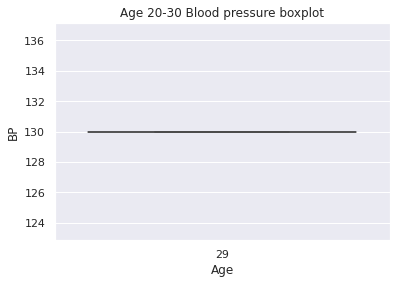

In [26]:
# boxplot for blood pressure in age group 20-30
boxplt_func(age20_30['Age'],age20_30['BP'])

### Age 31-40 Blood pressure boxplot

Please enter title for the plot: Age 31-40 Blood pressure boxplot
Enter X-Label: Age
Enter Y-Label: BP


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


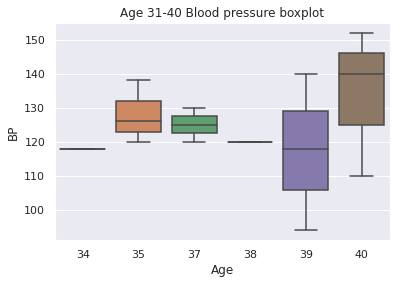

In [27]:
# boxplot for blood pressure in age group 31-40
boxplt_func(age31_40['Age'],age31_40['BP'])

### Age 41-50 Blood pressure boxplot

Please enter title for the plot: Age 41-50 Blood pressure boxplot
Enter X-Label: Age
Enter Y-Label: BP


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


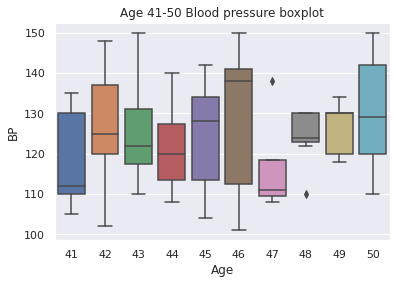

In [28]:
# boxplot for blood pressure in age group 41-50
boxplt_func(age41_50['Age'],age41_50['BP'])

### Age 51-60 Blood pressure boxplot

Please enter title for the plot: Age 51-60 Blood pressure boxplot
Enter X-Label: Age
Enter Y-Label: BP


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


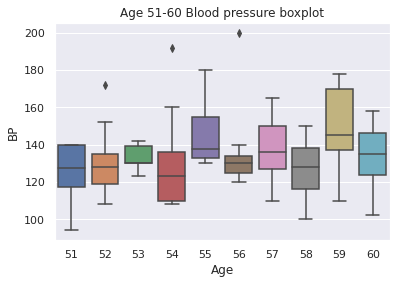

In [29]:
# boxplot for blood pressure in age group 51-60
boxplt_func(age51_60['Age'],age51_60['BP'])

### Age 61-70 Blood pressure boxplot

Please enter title for the plot: Age 61-70 Blood pressure boxplot
Enter X-Label: Age
Enter Y-Label: BP


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


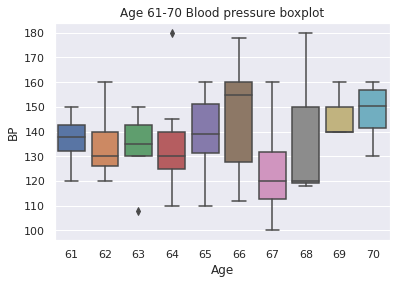

In [30]:
# boxplot for blood pressure in age group 61-70
boxplt_func(age61_70['Age'],age61_70['BP'])

### Age 71-80 Blood pressure boxplot

Please enter title for the plot: Age 71-80 Blood pressure boxplot
Enter X-Label: Age
Enter Y-Label: BP


/home/dp/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


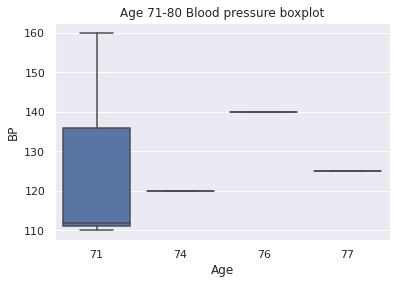

In [31]:
# boxplot for blood pressure in age group 71-80
boxplt_func(age71_80['Age'],age71_80['BP'])

## No. of blood Vessels clot

#### Note: age group 20-30 and 31-40 has 0 blood vessel clots.

In [32]:
# age 31-40 total counts of clotted blood vessels
age31_40['Number of vessels fluro'].value_counts()

0    14
Name: Number of vessels fluro, dtype: int64

### Age 41-50 No. of blood Vessels clot

Please enter title for the plot: Age 41-50 No. of blood Vessels clot


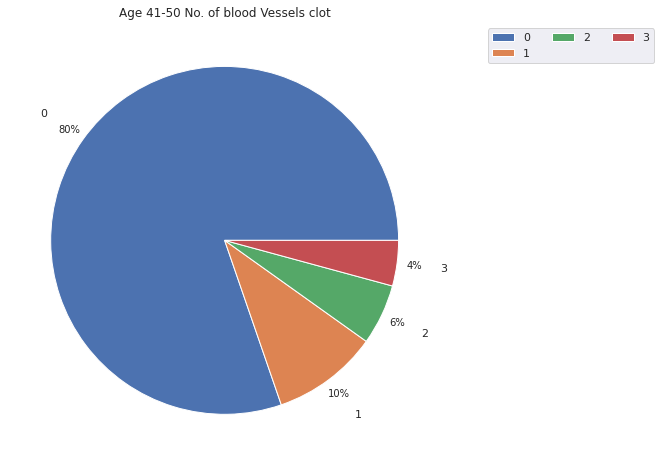

In [33]:
# pie chart for Number of vessels fluro in age group 41-50
a_41_50 = age41_50['Number of vessels fluro'].value_counts()
pie_func(a_41_50)

### Age 51-60 No. of blood Vessels clot

Please enter title for the plot: Age 51-60 No. of blood Vessels clot


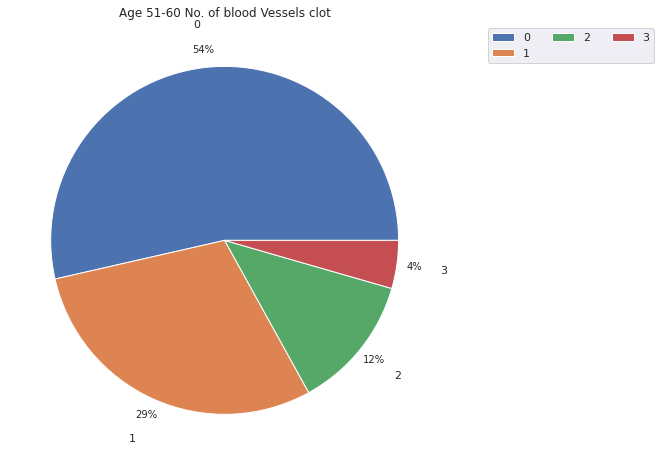

In [34]:
# pie chart for Number of vessels fluro in age group 51-60
a_51_60 = age51_60['Number of vessels fluro'].value_counts()
pie_func(a_51_60)

### Age 61-70 No. of blood Vessels clot

Please enter title for the plot: Age 61-70 No. of blood Vessels clot


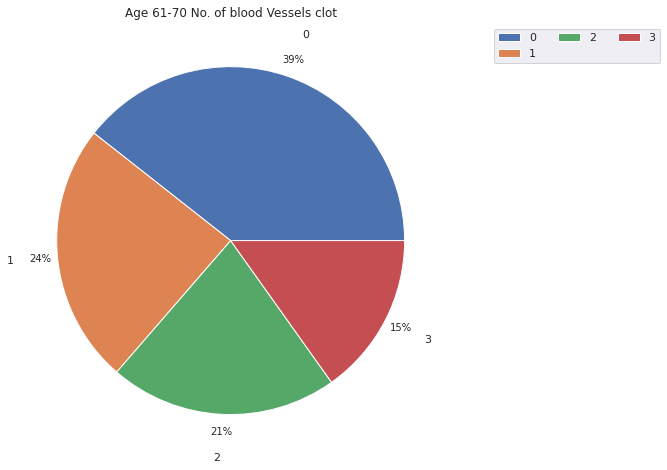

In [35]:
# pie chart for Number of vessels fluro in age group 61-70
a_61_70 = age61_70['Number of vessels fluro'].value_counts()
pie_func(a_61_70)

### Age 71-80 No. of blood Vessels clot

Please enter title for the plot: Age 71-80 No. of blood Vessels clot


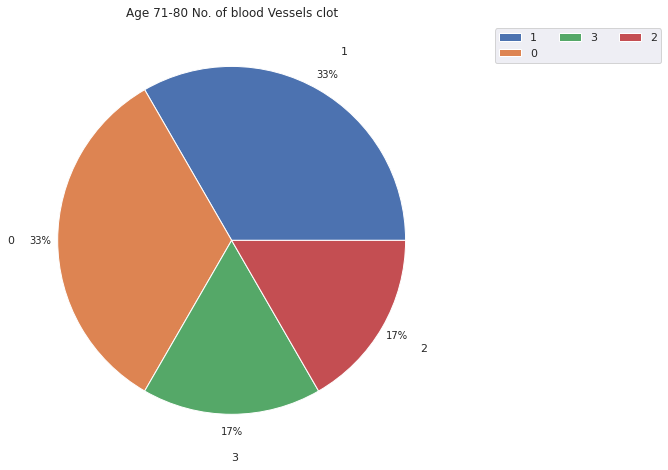

In [36]:
# pie chart for Number of vessels fluro in age group 71-80
a_71_80 = age71_80['Number of vessels fluro'].value_counts()
pie_func(a_71_80)

## finding no. of male and female possesing Heart Disease in all age groups

In [37]:
# selecting records from different age group having heart disease
hd_mf_20_30 = age20_30.loc[(age20_30['Heart Disease'] == 1)]
hd_mf_31_40 = age31_40.loc[(age31_40['Heart Disease'] == 1)]
hd_m = age41_50.loc[(age41_50['Heart Disease'] == 1)]
hd_mf_51_60 = age51_60.loc[(age51_60['Heart Disease'] == 1)]
hd_mf_61_70 = age61_70.loc[(age61_70['Heart Disease'] == 1)]
hd_mf_71_80 = age71_80.loc[(age71_80['Heart Disease'] == 1)]


# Analysing Chest pain type

#### cp : Chest Pain type 
##### - Value 1: typical angina
##### - Value 2: atypical angina
##### - Value 3: non-anginal pain
##### - Value 4: asymptomatic

### Chest pain type of age 31-40

Please enter title for the plot: Chest pain type of age 31-40


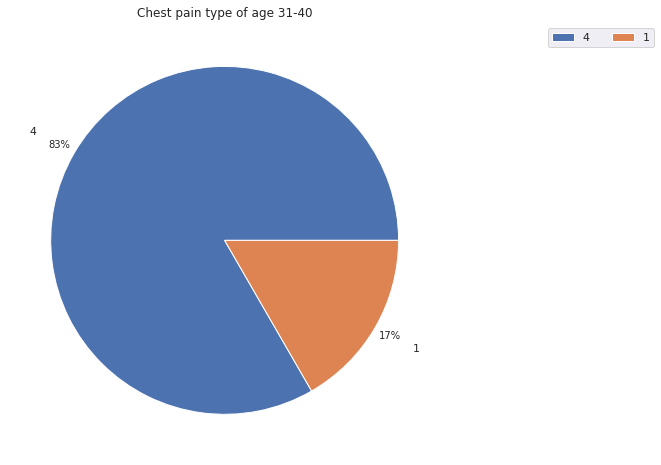

In [38]:
# pie chart for Chest pain type of age 31-40
pie_func(hd_mf_31_40['Chest pain type'].value_counts())

### Chest pain type of age 41-50

Please enter title for the plot: Chest pain type of age 41-50


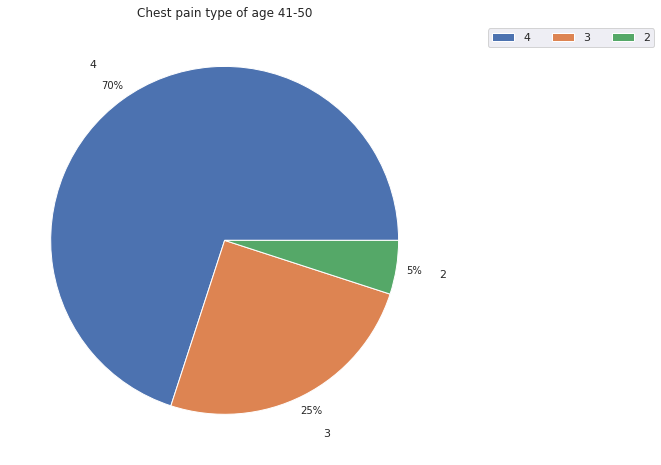

In [39]:
# pie chart for Chest pain type of age 41-50
pie_func(hd_m['Chest pain type'].value_counts())

### Chest pain type of age 51-60

Please enter title for the plot: Chest pain type of age 51-60


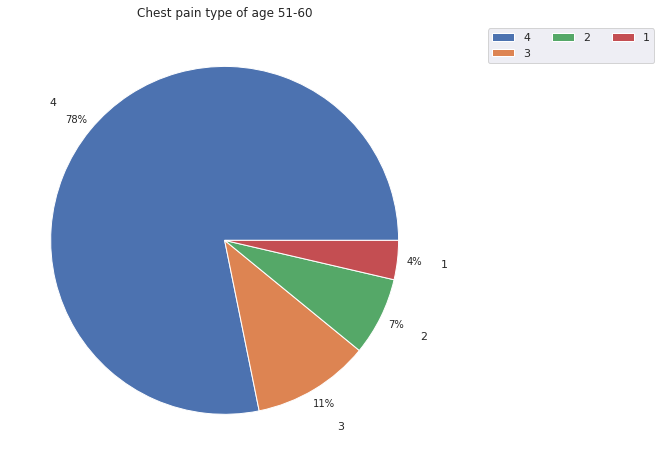

In [40]:
# pie chart for Chest pain type of age 51-60
pie_func(hd_mf_51_60['Chest pain type'].value_counts())

### Chest pain type of age 61-70

Please enter title for the plot: Chest pain type of age 61-70


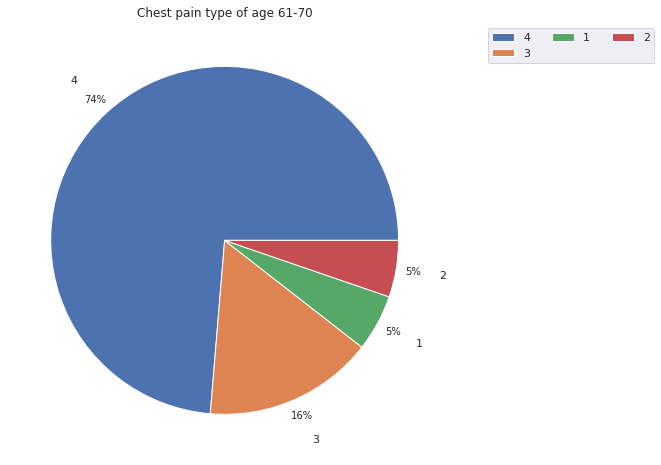

In [41]:
# pie chart for Chest pain type of age 61-70
pie_func(hd_mf_61_70['Chest pain type'].value_counts())

### Chest pain type of age 71-80

In [42]:
hd_mf_71_80['Chest pain type'] # only one individual has chest pain 

199    4
Name: Chest pain type, dtype: int64

# Analysing EKG Results

##### rest_ecg : resting electrocardiographic results
##### - Value 0: normal
##### - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
##### - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


### Age 31-40 EKG Results

Please enter title for the plot: Age 31-40 EKG Results


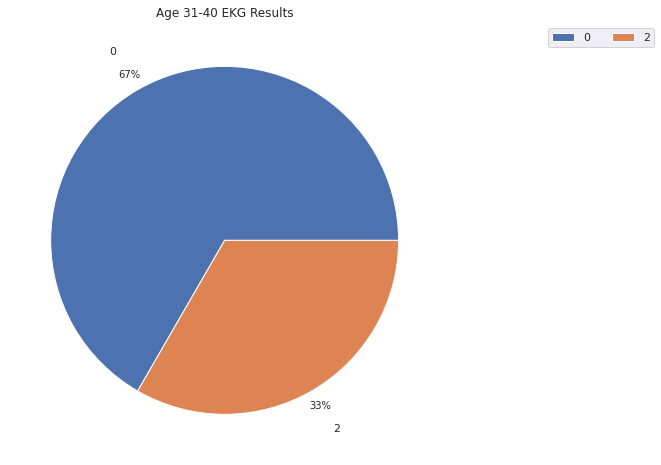

In [43]:
# pie chart for Age 31-40 EKG Results
pie_func(hd_mf_31_40['EKG results'].value_counts())

### Age 41-50 EKG Results

Please enter title for the plot: Age 41-50 EKG Results


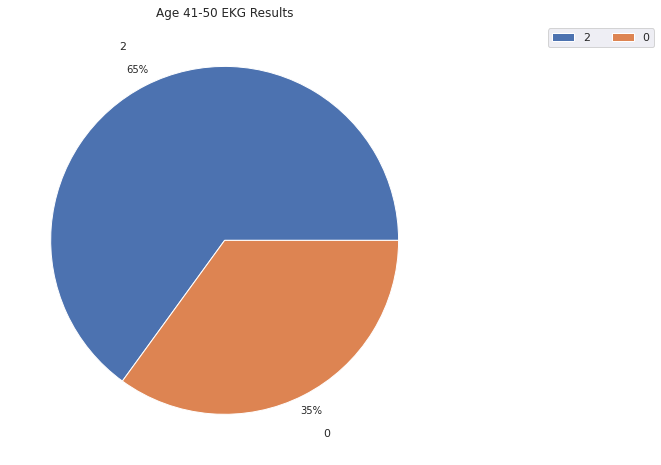

In [44]:
# pie chart for Age 41-50 EKG Results
pie_func(hd_m['EKG results'].value_counts())

### Age 51-60 EKG Results

Please enter title for the plot: Age 51-60 EKG Results


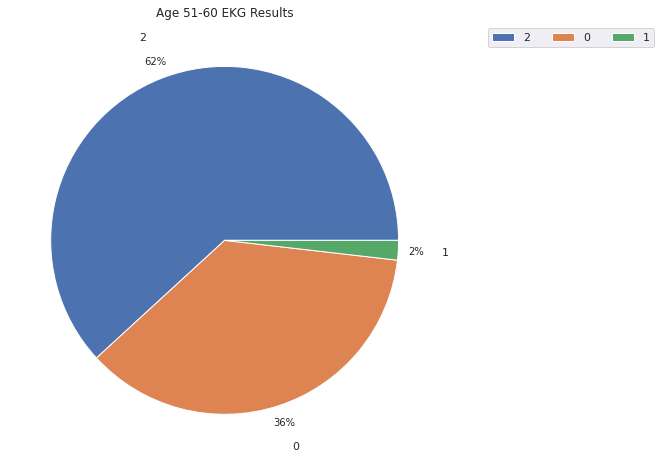

In [45]:
# pie chart for Age 51-60 EKG Results
pie_func(hd_mf_51_60['EKG results'].value_counts())

### Age 61-70 EKG Results

Please enter title for the plot: Age 61-70 EKG Results


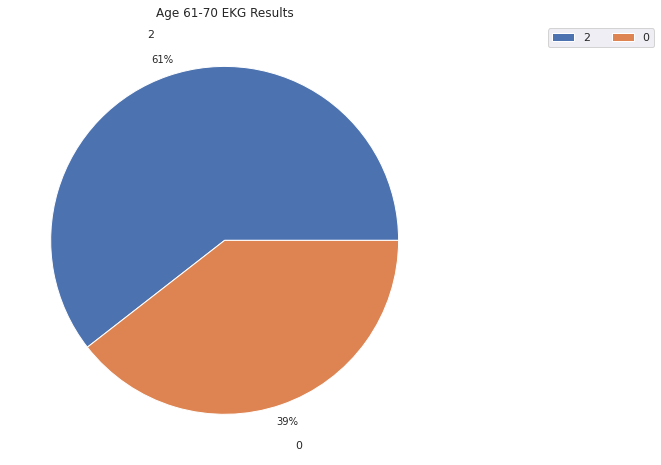

In [46]:
# pie chart for Age 61-70 EKG Results
pie_func(hd_mf_61_70['EKG results'].value_counts())

### Age 71-80 EKG Results

Please enter title for the plot: Age 71-80 EKG Results


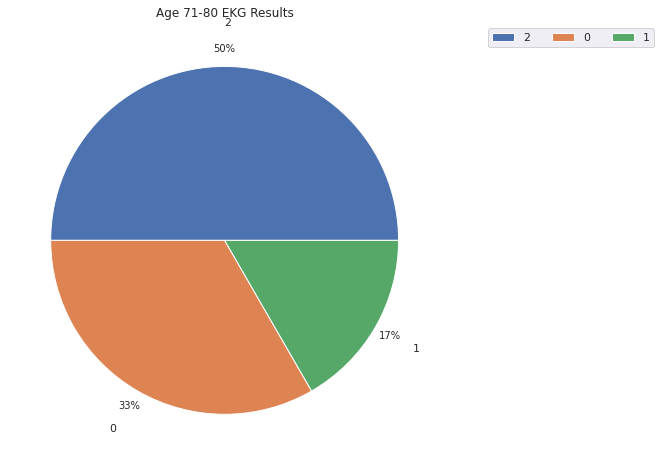

In [47]:
hd_mf_71_80['EKG results'].describe() # patient of heart disease ekg results
pie_func(age71_80['EKG results'].value_counts()) # all people ekg results

## Analysing Fbs Results

##### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

### Age 31-40 Fbs results

In [48]:
hd_mf_31_40['FBS over 120'].describe()

count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: FBS over 120, dtype: float64

### Age 41-50 Fbs results

Please enter title for the plot: Age 41-50 Fbs results


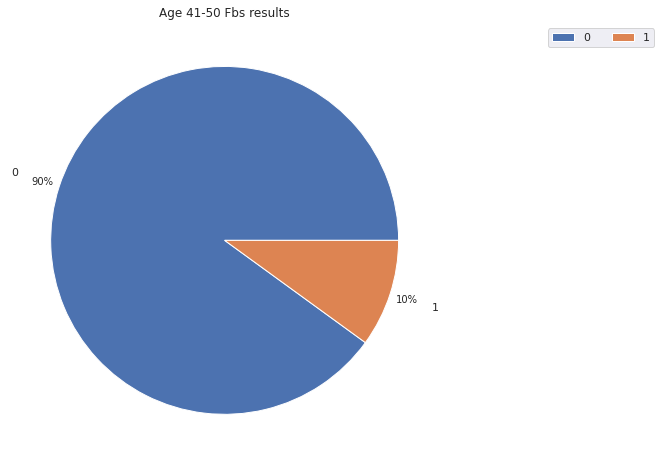

In [49]:
# pie chart for Age 41-50 FBS over 120
pie_func(hd_m['FBS over 120'].value_counts())

### Age 51-60 Fbs results

Please enter title for the plot: Age 51-60 Fbs results


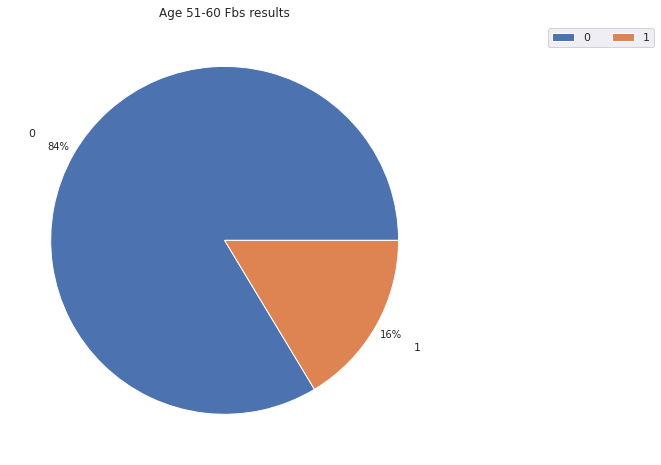

In [50]:
# pie chart for Age 51-60 FBS over 120
pie_func(hd_mf_51_60['FBS over 120'].value_counts())

### Age 61-70 Fbs results

Please enter title for the plot: Age 61-70 Fbs results


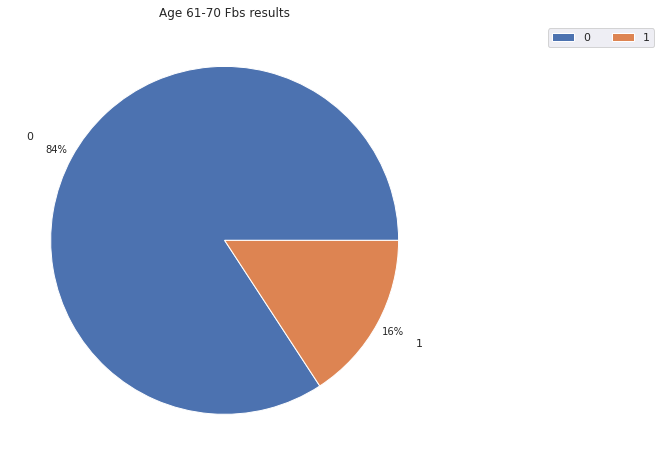

In [51]:
# pie chart for Age 61-70 FBS over 120
pie_func(hd_mf_61_70['FBS over 120'].value_counts())

### Age 71-80 Fbs results

In [52]:
hd_mf_71_80['FBS over 120'].describe()

count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: FBS over 120, dtype: float64

## Analysing Max HR (Heart Rate)

### Age 31-40 Max HR

Please enter title for the plot: Age 31-40 Max HR


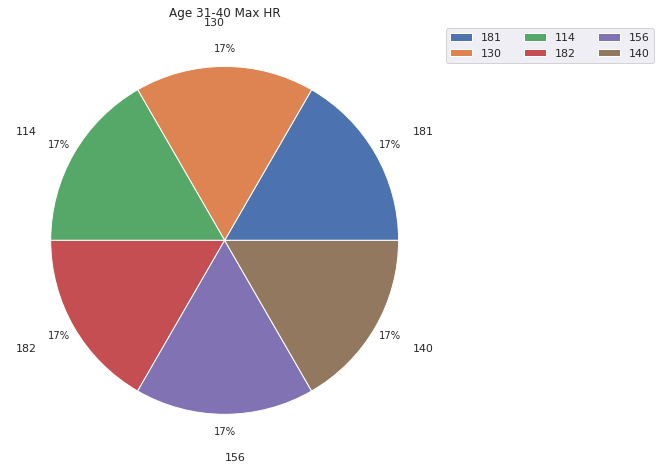

In [53]:
# pie chart for age 31-40 Max HR
pie_func(hd_mf_31_40['Max HR'].value_counts())

### Age 41-50 Max HR

Please enter title for the plot: Age 41-50 Max HR


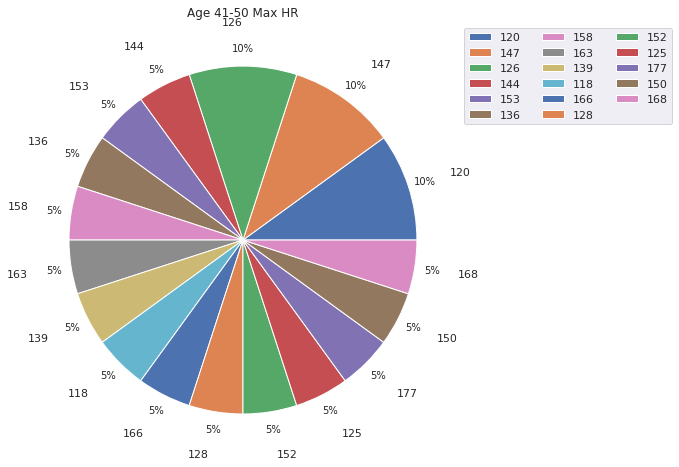

In [54]:
# pie chart for age 41-50 Max HR
pie_func(hd_m['Max HR'].value_counts())

### Age 51-60 Max HR

Please enter title for the plot: Age 51-60 Max HR


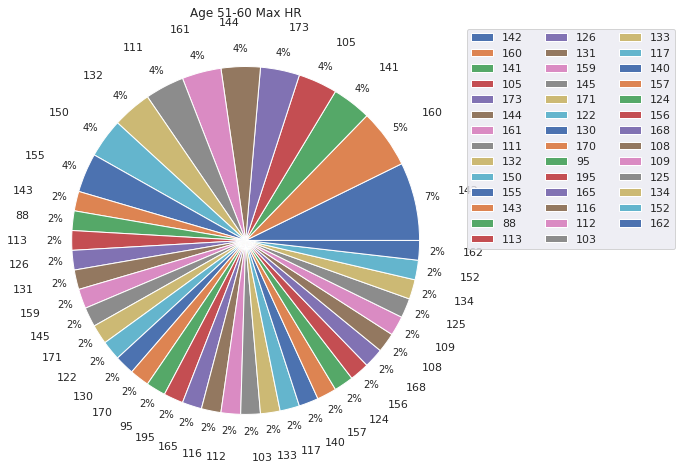

In [55]:
# pie chart for age 51-60 Max HR
pie_func(hd_mf_51_60['Max HR'].value_counts())

### Age 61-70 Max HR

Please enter title for the plot: Age 61-70 Max HR


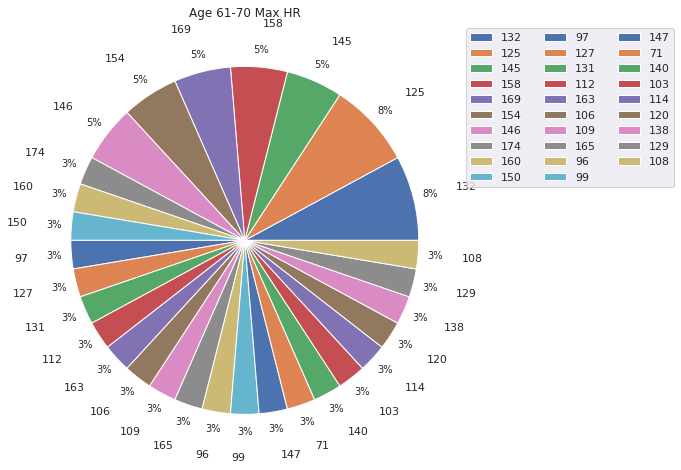

In [56]:
# pie chart for age 61-70 Max HR
pie_func(hd_mf_61_70['Max HR'].value_counts())

### Age 71-80 Max HR

In [57]:
hd_mf_71_80

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
199,77,1,4,125,304,0,2,162,1,0.0,1,3,3,1


## Analysing Excercise angina

##### exercise induced angina (1 = yes; 0 = no)

### Excercise angina for age 31-40

Please enter title for the plot: Excercise angina for age 31-40


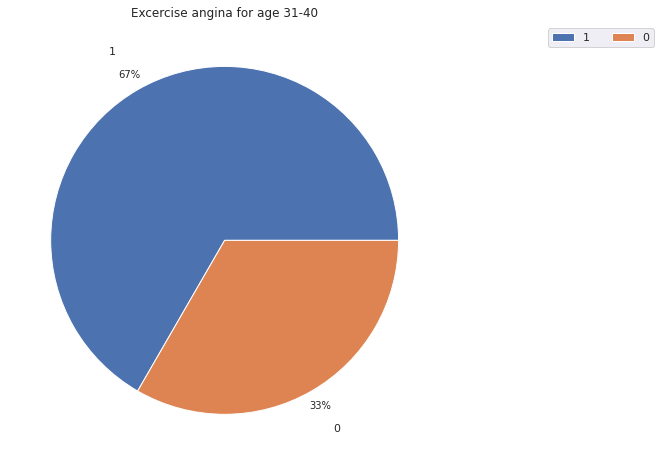

In [58]:
# pie chart of Excercise angina for age 31-40
pie_func(hd_mf_31_40['Exercise angina'].value_counts())

### Excercise angina for age 41-50

Please enter title for the plot: Excercise angina for age 41-50


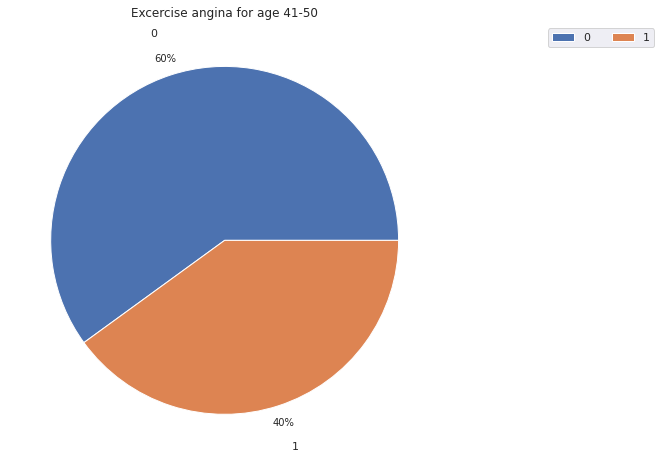

In [59]:
# pie chart of Excercise angina for age 41-50
pie_func(hd_m['Exercise angina'].value_counts())

### Excercise angina for age 51-60

Please enter title for the plot: Excercise angina for age 51-60


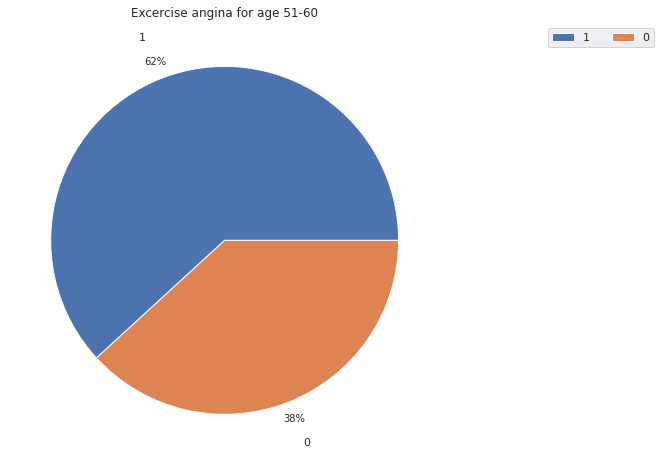

In [60]:
# pie chart of Excercise angina for age 51-60
pie_func(hd_mf_51_60['Exercise angina'].value_counts())

### Excercise angina for age 61-70

Please enter title for the plot: Excercise angina for age 61-70


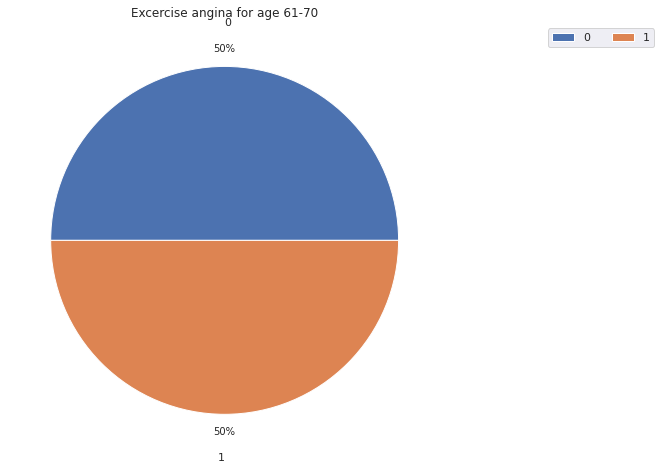

In [61]:
# pie chart of Excercise angina for age 61-70
pie_func(hd_mf_61_70['Exercise angina'].value_counts())

### Excercise angina for age 71-80

In [62]:
hd_mf_71_80['Exercise angina'].describe()

count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Exercise angina, dtype: float64

## Analysing ST Depression

##### ST depression induced by exercise relative to rest
#### ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline. It occurs due to low blood supply to heart.
####     ST depression can be either upsloping, downsloping, or horizontal.


### ST depression for age 31-40

Please enter title for the plot: ST depression for age 31-40


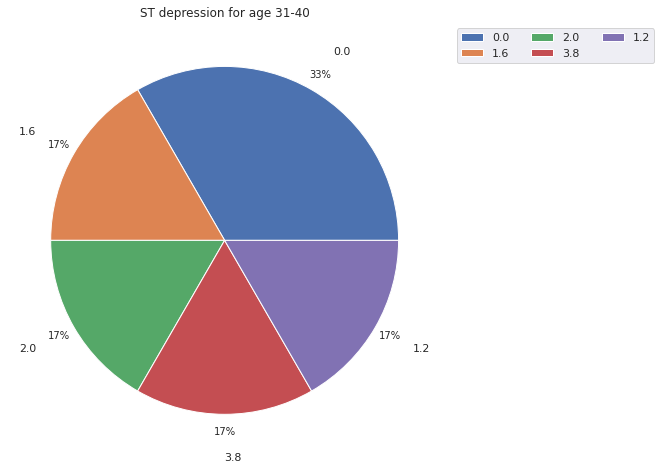

In [63]:
# pie chart of ST depression for age 31-40
pie_func(hd_mf_31_40['ST depression'].value_counts())

### ST depression for age 41-50

Please enter title for the plot: ST depression for age 41-50


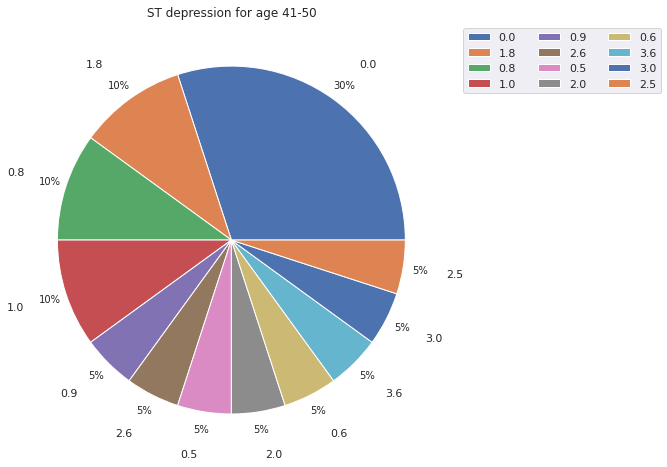

In [64]:
# pie chart of ST depression for age 41-50
pie_func(hd_m['ST depression'].value_counts())

### ST depression for age 51-60

Please enter title for the plot: ST depression for age 51-60


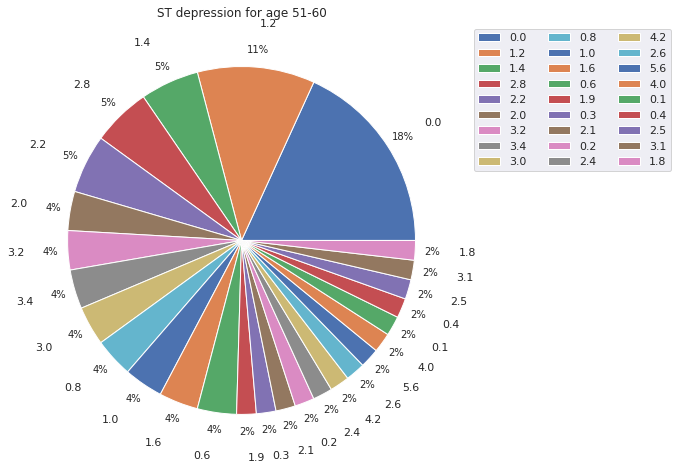

In [65]:
# pie chart of ST depression for age 51-60
pie_func(hd_mf_51_60['ST depression'].value_counts())

### ST depression for age 61-70

Please enter title for the plot: ST depression for age 61-70


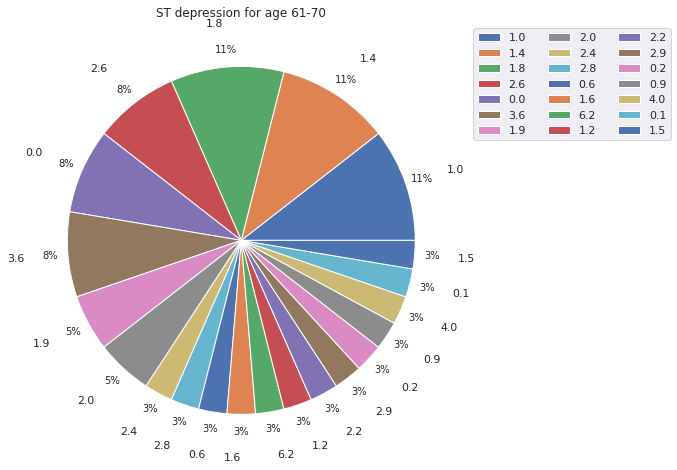

In [66]:
# pie chart of ST depression for age 61-70
pie_func(hd_mf_61_70['ST depression'].value_counts())

### ST depression for age 71-80

In [67]:
hd_mf_71_80['ST depression'].describe()

count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: ST depression, dtype: float64

## Analysing Slope of ST

### Slope of ST for age 31-40

Please enter title for the plot: Slope of ST for age 31-40


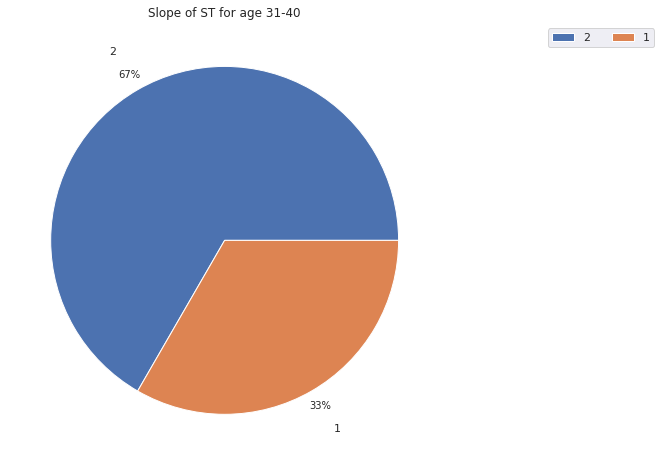

In [68]:
# pie chart for Slope of ST in age 31-40
pie_func(hd_mf_31_40['Slope of ST'].value_counts())

### Slope of ST for age 41-50

Please enter title for the plot: Slope of ST for age 41-50


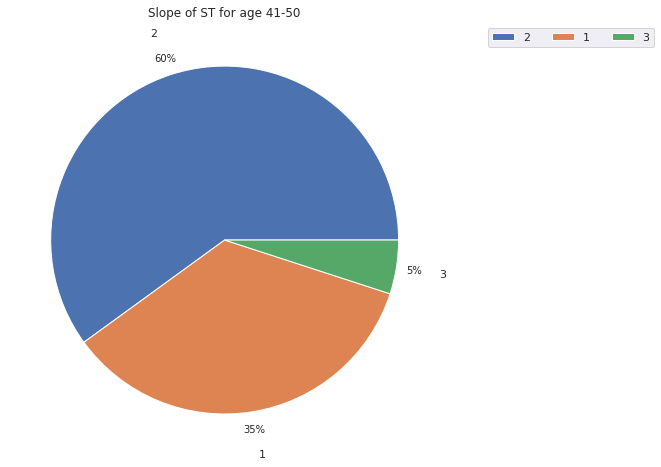

In [69]:
# pie chart for Slope of ST in age 41-50
pie_func(hd_m['Slope of ST'].value_counts())

### Slope of ST for age 51-60

Please enter title for the plot: Slope of ST for age 51-60


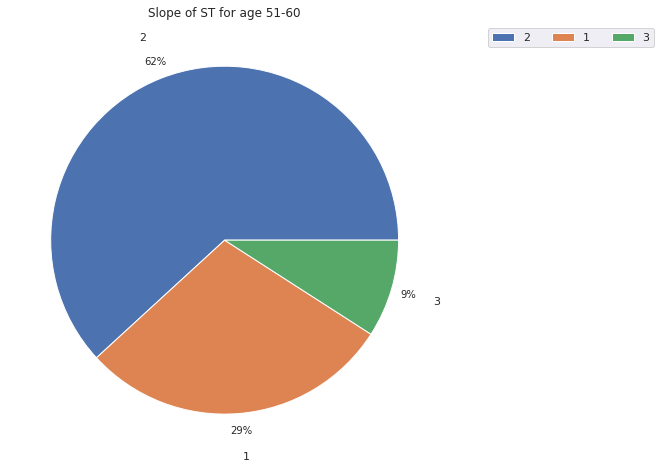

In [70]:
# pie chart for Slope of ST in age 51-60
pie_func(hd_mf_51_60['Slope of ST'].value_counts())

### Slope of ST for age 61-70

Please enter title for the plot: Slope of ST for age 61-70


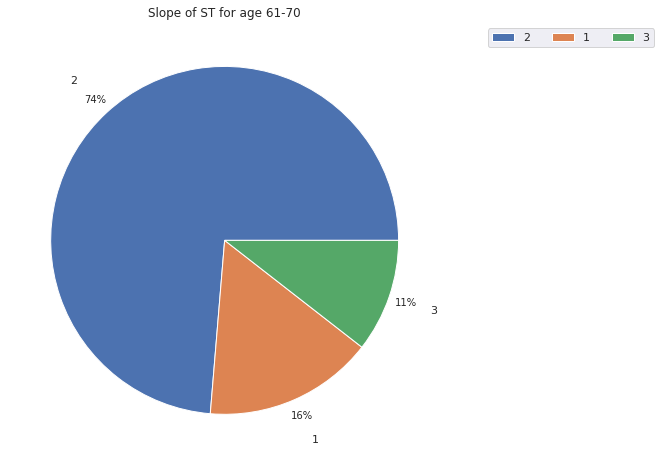

In [71]:
# pie chart for Slope of ST in age 61-70
pie_func(hd_mf_61_70['Slope of ST'].value_counts())

### Slope of ST for age 71-80

In [72]:
hd_mf_71_80['Slope of ST'].describe()


count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Slope of ST, dtype: float64

# Analysing Heart Disease

### Heart disease in age 31-40

Please enter title for the plot: Heart disease in age 31-40


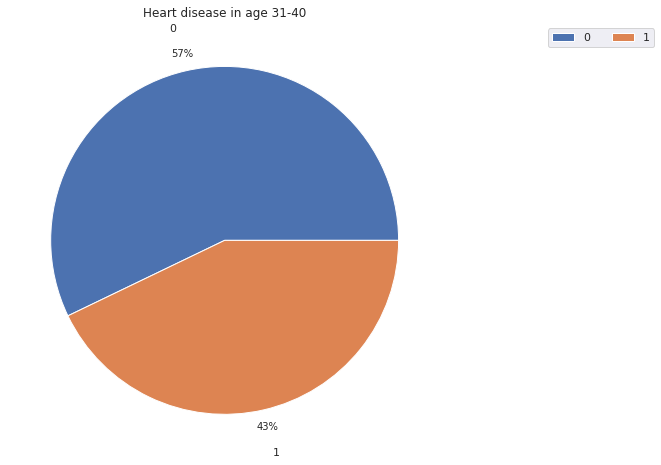

In [73]:
# pie chart for Heart disease in age 31-40
pie_func(age31_40['Heart Disease'].value_counts())

### Heart disease in age 41-50

Please enter title for the plot: Heart disease in age 41-50


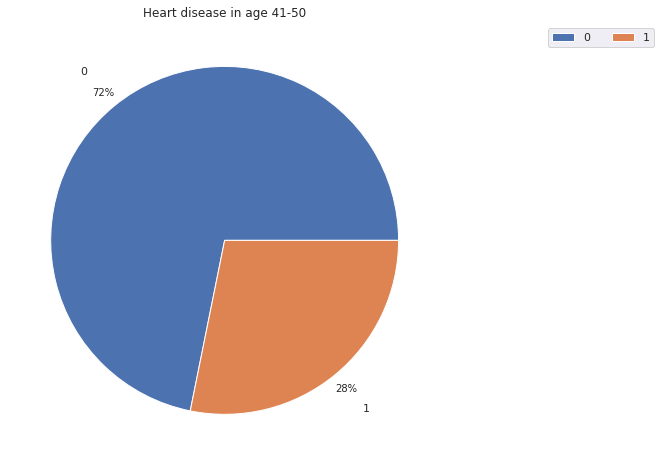

In [74]:
# pie chart for Heart disease in age 41-50
pie_func(age41_50['Heart Disease'].value_counts())

### Heart disease in age 51-60

Please enter title for the plot: Heart disease in age 51-60


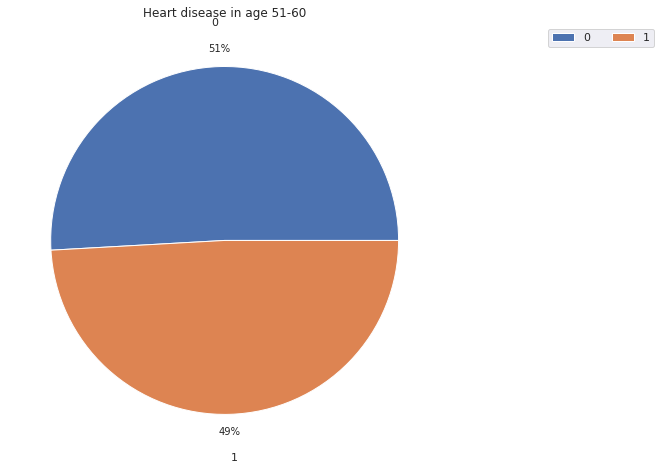

In [75]:
# pie chart for Heart disease in age 51-60
pie_func(age51_60['Heart Disease'].value_counts())

### Heart disease in age 61-70

Please enter title for the plot: Heart disease in age 61-70


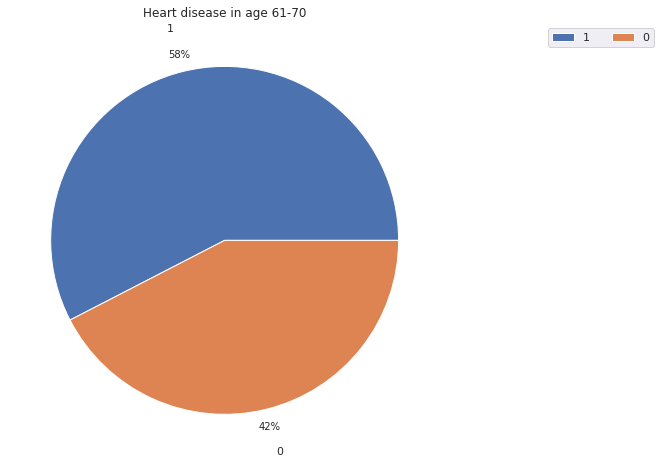

In [76]:
# pie chart for Heart disease in age 61-70
pie_func(age61_70['Heart Disease'].value_counts())

### Heart disease in age 71-80

Please enter title for the plot: Heart disease in age 71-80


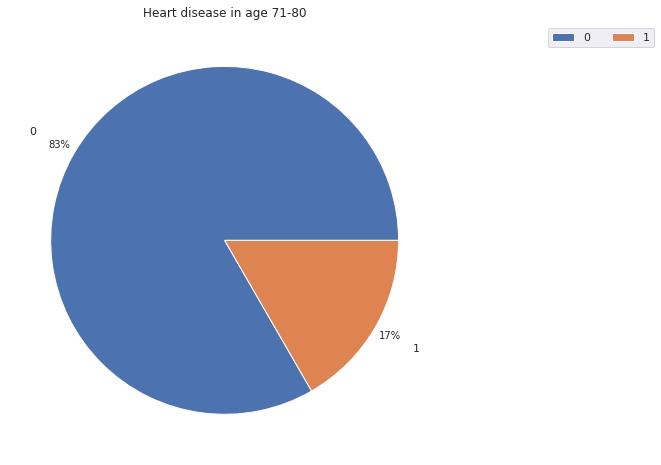

In [77]:
# pie chart for Heart disease in age 71-80
pie_func(age71_80['Heart Disease'].value_counts())

# Correlation Analysis

In [78]:
df.head(10)
#del df['bin']

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,bins
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1,"(60, 70]"
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,"(60, 70]"
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,"(50, 60]"
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,"(60, 70]"
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,"(70, 80]"
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0,"(60, 70]"
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1,"(50, 60]"
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1,"(50, 60]"
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1,"(50, 60]"
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1,"(60, 70]"


In [79]:
correlation= df[['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease']]


/home/dp/.local/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/dp/.local/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/dp/.local/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/dp/.local/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/dp/.local/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/dp/.local

/home/dp/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dp/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


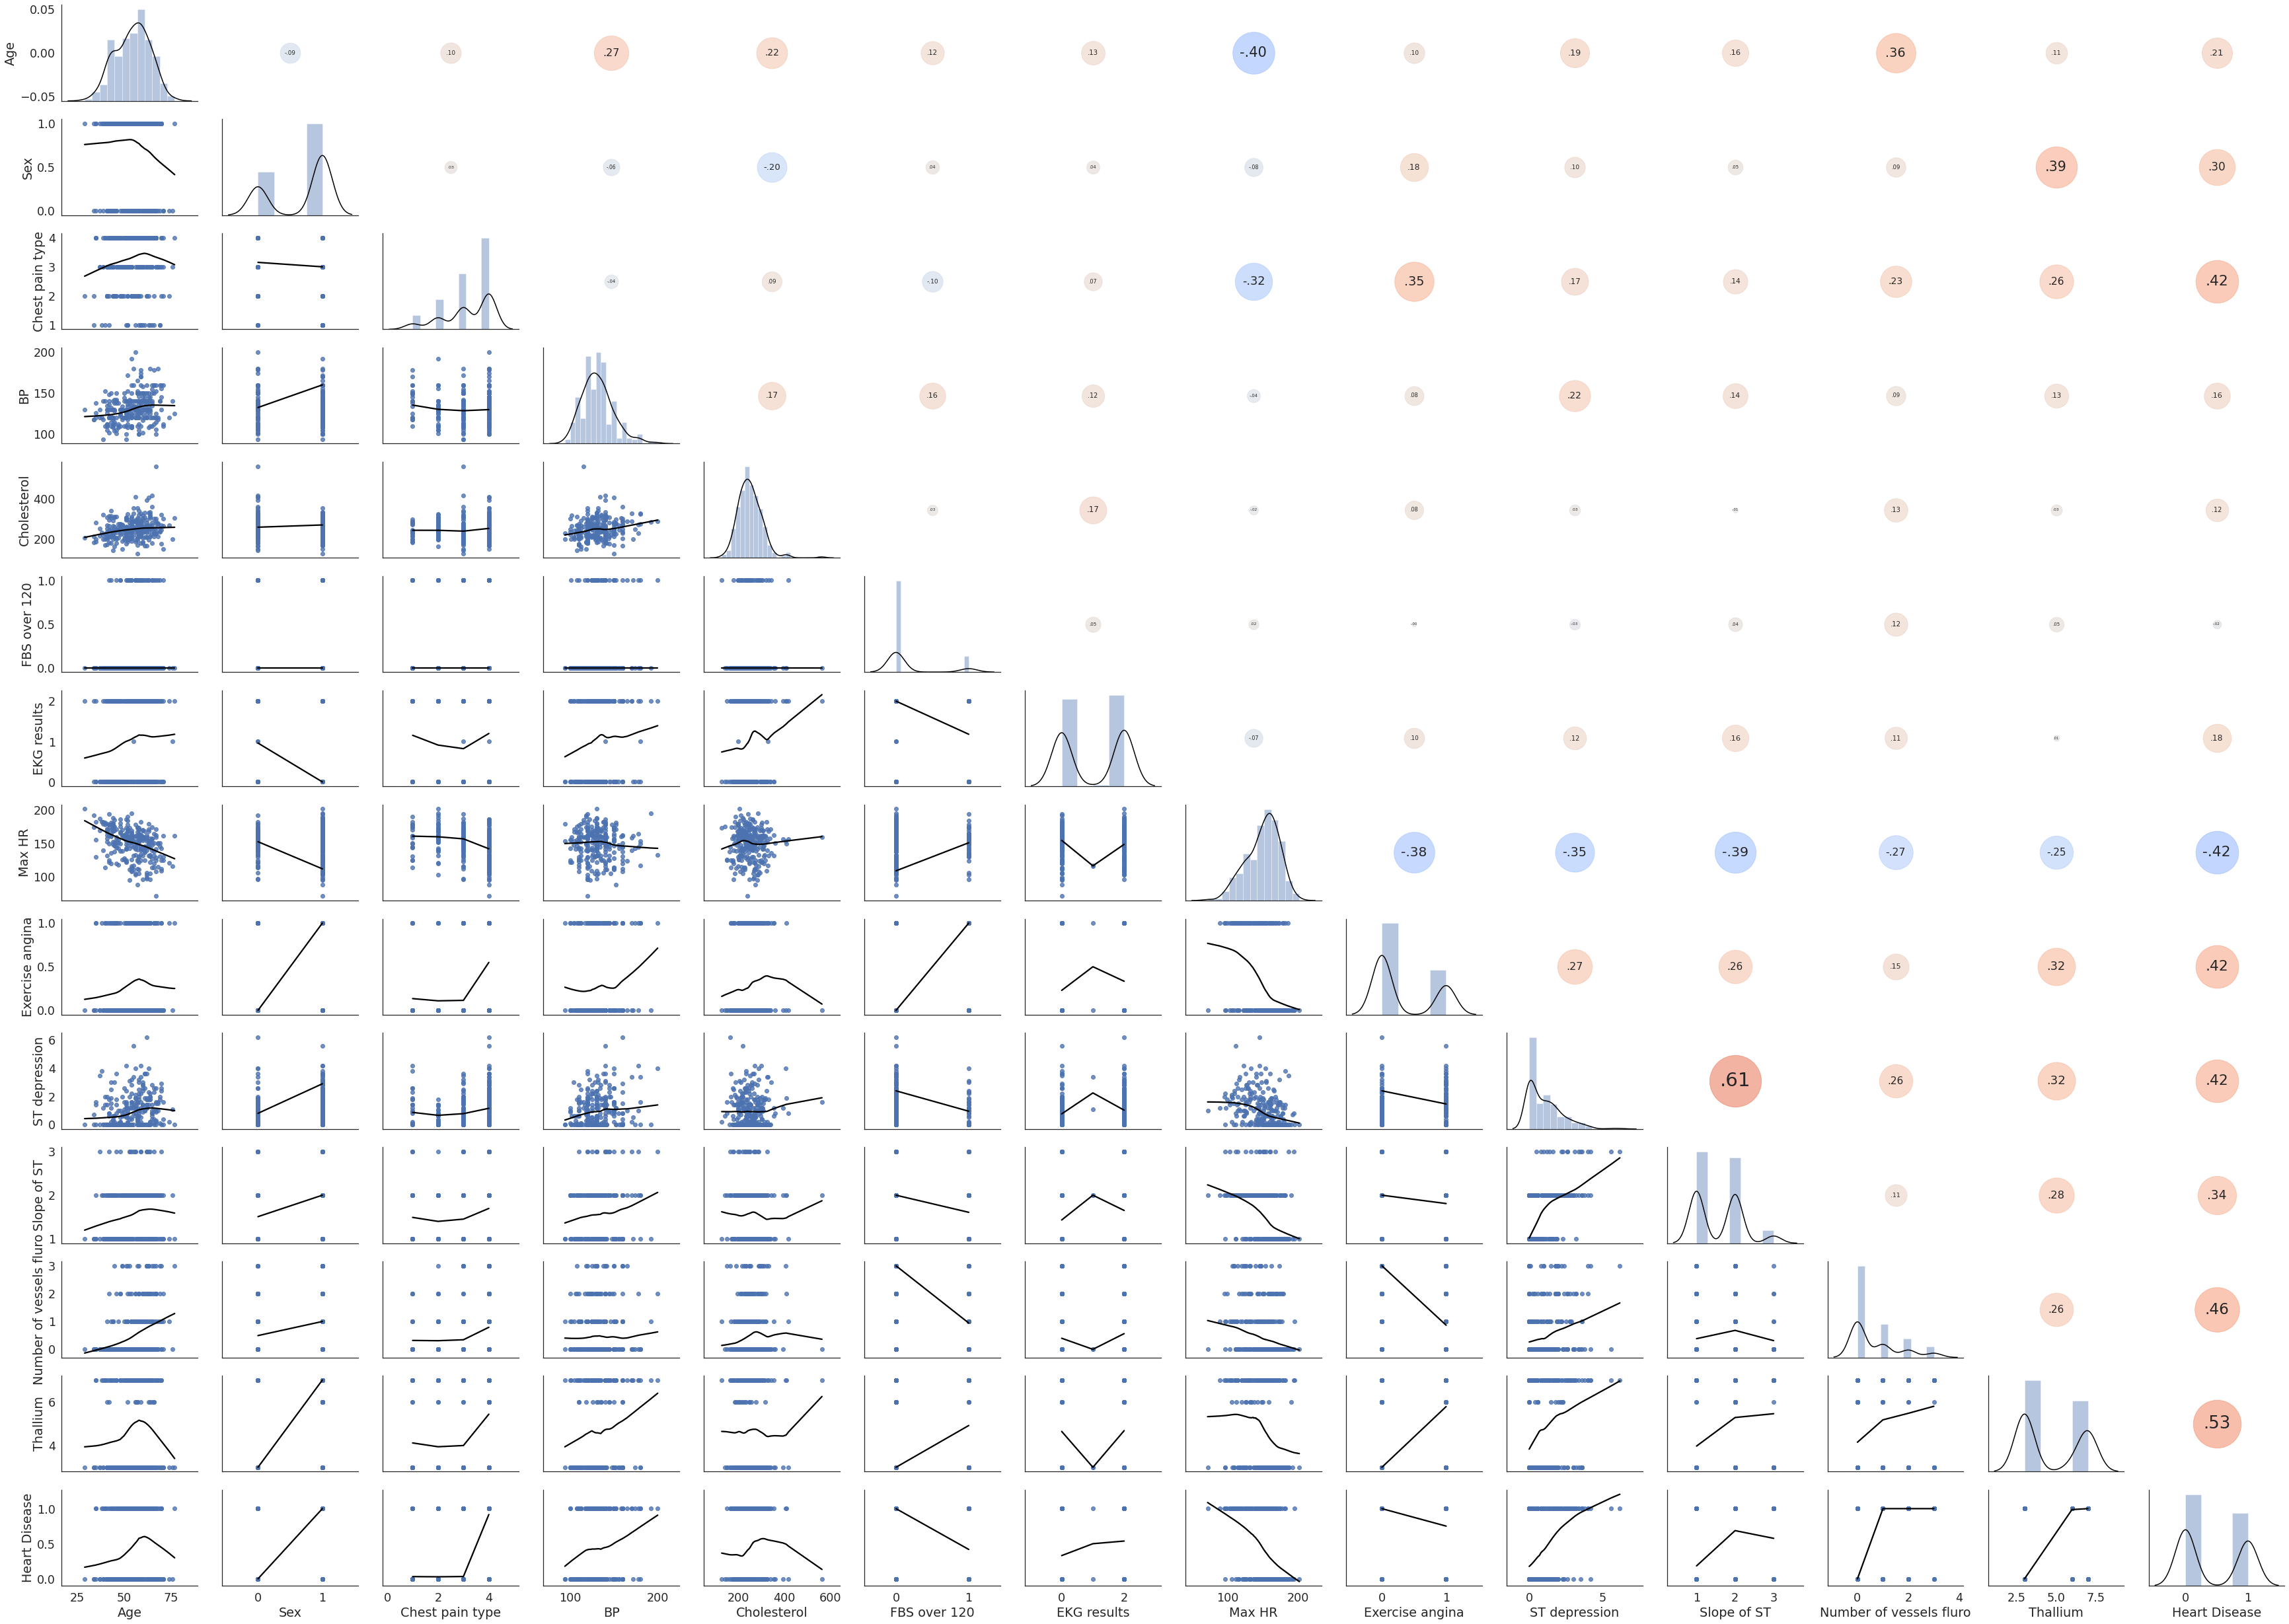

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
# function for Pair Grid of correlation using pearson method
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson') # calculate correlation using pearson method
    corr_text = f"{corr_r:2.2f}".replace("0.", ".") # replace "0." with only "."
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes) #A scatter plot of y vs. x with varying marker size or color.
    font_size = abs(corr_r) * 40 + 5 
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size) #the text is placed at xy.

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(correlation, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)


In [81]:
# correaltion of all the attributes using pearson
crns = correlation.corr(method='pearson')
crns

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


Text(0.5, 1.0, 'Correlation Heatmap')

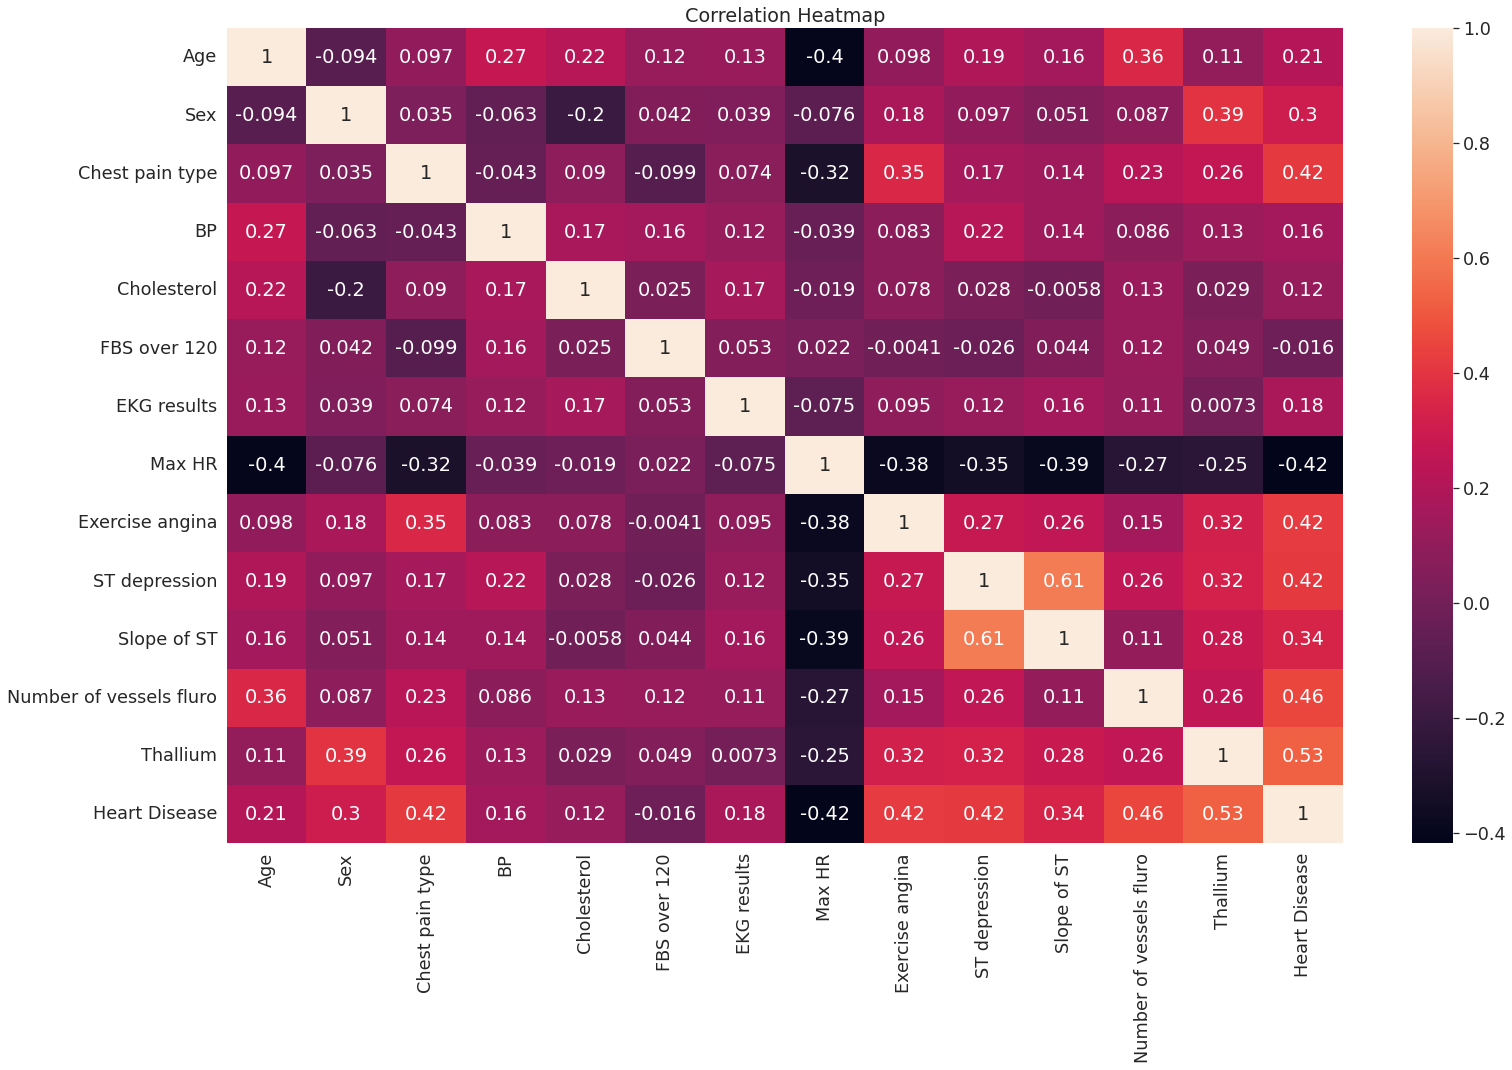

In [82]:
# Heatmap of correlation
plt.figure(figsize=(25,15))
sns.heatmap(crns, annot=True)
plt.title("Correlation Heatmap") 

# PCA analysis

In [83]:
# PCA stands for principal component analysis
# it is used for dimensionality reduction and finding 
#important components consisting of important features from dataset
from sklearn.decomposition import PCA

In [84]:
#n_components == min(n_samples, n_features)
# n_components selects total 85% of data to find imp components
pca = PCA(n_components = 0.85) 
pca_crns=pca.fit(crns)

In [85]:
#explained_variance_ratio_ is variance explained by each of the principal components (eigenvectors)
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100) #explained variances

Variances (Percentage):
[42.4262112  15.68498384  9.4789438   7.8207857   5.25524641  4.52428533]


In [86]:
# calculate cumulative variance using cumsum()
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)

Cumulative Variances (Percentage):
[42.4262112  58.11119504 67.59013884 75.41092454 80.66617096 85.19045629]


Text(0.5, 1.0, 'scree plot of components and explained variance')

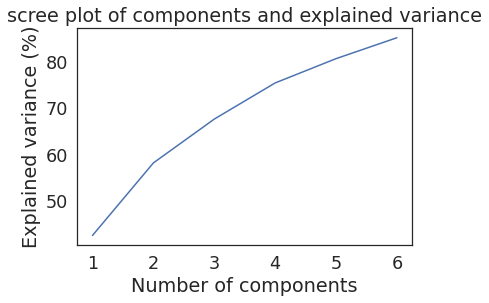

In [87]:
# scree plot to visualize no. of components needed to capture various amount of variability in data.
components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1),
np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("scree plot of components and explained variance")

In [88]:
# finding importance of each feature that contributes to each components of pca object.
pca_components = abs(pca.components_)
print(pca_components)

[[0.18039042 0.1172385  0.28491579 0.00675118 0.04093069 0.11615126
  0.02033397 0.47944835 0.31917783 0.34320806 0.32262588 0.22726397
  0.30007687 0.40198564]
 [0.49290416 0.53561166 0.07179512 0.32509541 0.39891763 0.10306223
  0.17070548 0.17882898 0.11386459 0.07139711 0.0721961  0.15535539
  0.27184738 0.08447219]
 [0.03286358 0.08501016 0.48189324 0.30400341 0.34837853 0.24152068
  0.02838541 0.0074331  0.15085012 0.40467267 0.479454   0.22280321
  0.0340098  0.13893689]
 [0.33687223 0.27343637 0.17632881 0.06812801 0.17621339 0.51940181
  0.27417885 0.1077111  0.15002199 0.22404542 0.29793616 0.43214547
  0.18481207 0.07769899]
 [0.03883384 0.18581984 0.0898651  0.37933035 0.19358971 0.14824921
  0.79554861 0.12173529 0.12021766 0.06341798 0.06604891 0.1612169
  0.23597061 0.01772541]
 [0.0719925  0.27674146 0.32369658 0.27910167 0.17152944 0.58516191
  0.19131971 0.16806179 0.35890262 0.08529701 0.16317567 0.20268428
  0.22305809 0.21288595]]


In [89]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 6 values in each row
    temp = np.argpartition(-(pca_components[row]), 6)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')
    
    

Top 4 most important features in each component
Component 0: ['Max HR', 'Heart Disease', 'ST depression', 'Slope of ST']
Component 1: ['Sex', 'Age', 'Cholesterol', 'BP']
Component 2: ['Chest pain type', 'Slope of ST', 'ST depression', 'Cholesterol']
Component 3: ['FBS over 120', 'Number of vessels fluro', 'Age', 'Slope of ST']
Component 4: ['EKG results', 'BP', 'Thallium', 'Cholesterol']
Component 5: ['FBS over 120', 'Exercise angina', 'Chest pain type', 'BP']


In [90]:
# transforming all 14 columns to principal 9 components
X_pca = pca.transform(crns)
print(X_pca.shape)
X_pca

(14, 6)


array([[-0.11245134, -0.7145892 ,  0.0548198 ,  0.33290032,  0.02000489,
        -0.02968066],
       [ 0.09187295,  0.91640997, -0.0882843 ,  0.25782768,  0.15293467,
        -0.20065768],
       [-0.37385273,  0.17889895,  0.60631538, -0.24039777, -0.09796568,
         0.30647579],
       [ 0.30339696, -0.46156194, -0.36212901,  0.04473189, -0.35718146,
        -0.21585281],
       [ 0.47711061, -0.56645849,  0.44143595, -0.23661777, -0.19092439,
        -0.11748012],
       [ 0.69232952, -0.09548283, -0.28160143,  0.53617304,  0.1205087 ,
         0.525938  ],
       [ 0.28864546, -0.21299698,  0.04701245, -0.34058112,  0.71495329,
        -0.1384535 ],
       [ 1.93188759,  0.41836854,  0.0231065 , -0.21597449, -0.14673943,
        -0.07018725],
       [-0.51150715,  0.23381708,  0.19712654, -0.20214981, -0.1222433 ,
         0.32917235],
       [-0.61198982, -0.06784714, -0.4870109 , -0.2773157 , -0.06743063,
        -0.05351749],
       [-0.51173344, -0.05722309, -0.57561813, -0.

<AxesSubplot:>

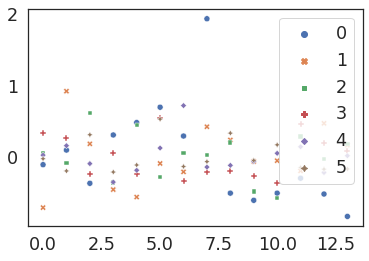

In [91]:
# scatter plot of all transformed 9 components
sns.scatterplot(data=X_pca)

Text(0, 0.5, 'correlation')

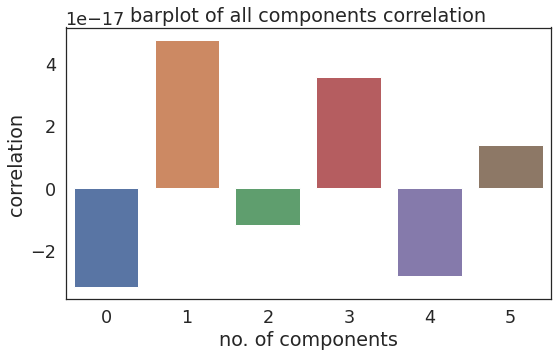

In [92]:
# barplot of components and its correlation
plt.figure(figsize=(8.7,5))
sns.barplot(data=X_pca, ci=None)
plt.title("barplot of all components correlation")
plt.xlabel("no. of components")
plt.ylabel("correlation")

Text(0, 0.5, 'Second Principal Component')

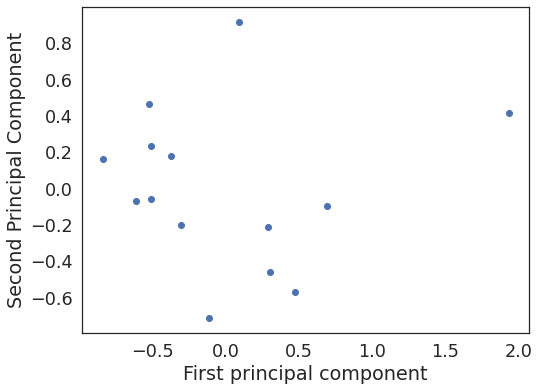

In [93]:
# scatterplot of first and sencond principal components.
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],cmap = 'rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')